# Neural Network Classification

This notebooks implements basic feedforward neural network for a supervised classification task.


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Dataset

the dataset is loaded and preprocessed before training

In [159]:
df = pd.read_csv("datasets\\abalone.csv")

In [160]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [161]:
df.isnull().sum()

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [162]:
X = df.drop(columns=['Rings'])
y = df['Rings']

In [163]:
cat_cols = [c for c in X.columns if X[c].dtype =='object']
num_cols = [c for c in X.columns if c not in cat_cols]

In [164]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),num_cols),
        ('cat', OneHotEncoder(),cat_cols)
    ]
)


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [166]:
X_train_p = preprocess.fit_transform(X_train)
X_test_p = preprocess.transform(X_test)

In [167]:
type(X_train_p)

numpy.ndarray

In [168]:
type(X_test_p)

numpy.ndarray

In [169]:
X_train_p.shape

(3341, 10)

In [170]:
X_test_p.shape

(836, 10)

In [171]:
import tensorflow as tf

## Model Architecture

Implement a fully connected neural network (MLP) with hidden layers using ReLU activation and output layer with Softmax for classification

In [172]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [173]:
model = Sequential([
    Dense(128, activation='relu', input_shape = (X_train_p.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1)
])

c:\Users\DG\miniconda3\envs\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss = "mse",
    metrics = [tf.keras.metrics.MAE, tf.keras.metrics.RootMeanSquaredError()]
)

In [175]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True
)

## Model fit and performance

In [177]:
history = model.fit(X_train_p,y_train, 
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 64, #overfit so 32,  
                    callbacks = [early_stop],
                    verbose = 1)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 103.7309 - mean_absolute_error: 9.5677 - root_mean_squared_error: 10.1788 - val_loss: 77.8360 - val_mean_absolute_error: 8.2243 - val_root_mean_squared_error: 8.8225
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.3189 - mean_absolute_error: 7.7675 - root_mean_squared_error: 8.4415 - val_loss: 46.3431 - val_mean_absolute_error: 6.0175 - val_root_mean_squared_error: 6.8076
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.4512 - mean_absolute_error: 5.5215 - root_mean_squared_error: 6.4337 - val_loss: 27.5040 - val_mean_absolute_error: 4.3643 - val_root_mean_squared_error: 5.2444
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.7778 - mean_absolute_error: 4.1986 - root_mean_squared_error: 5.1738 - val_loss: 21.9112 - val_mean_absolute_error: 3.7948 - val_root_mean_squared_error: 4.6809
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.9849 - mean_absolute_error: 3.5736 - root_me

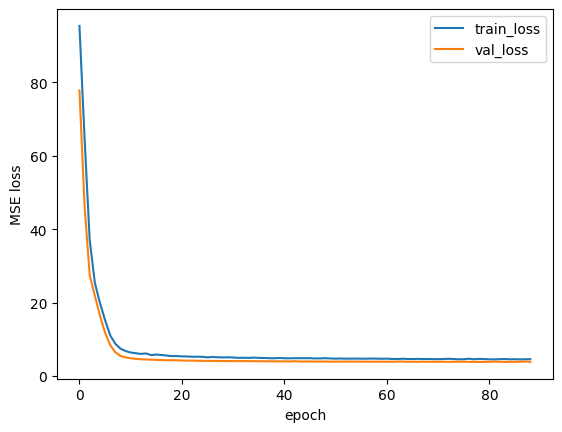

In [178]:
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.legend()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


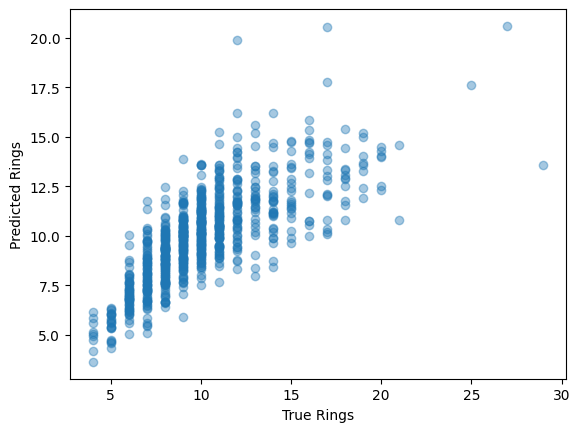

In [179]:
import numpy as np

pred = model.predict(X_test_p).reshape(-1)

plt.figure()
plt.scatter(y_test.to_numpy(), pred, alpha=0.4)
plt.xlabel("True Rings")
plt.ylabel("Predicted Rings")
plt.show()

In [180]:
print(r2_score(y_test,pred))

0.5696887373924255


In [ ]:
#Резултатите варираат зависно 
#од Learning rate, епохи, batch_size и Dropout nodes 